In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
import os
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/hungtrieu07/MelbourneHousePrice/master/"
DATA_PATH = os.path.join("data")
DOWNLOAD_URL = DOWNLOAD_ROOT + "Melbourne_housing_FULL.csv"

def fetch_data(download_url=DOWNLOAD_URL, data_path=DATA_PATH):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  data_path = os.path.join(data_path, "Melbourne_housing_FULL.csv")
  urllib.request.urlretrieve(download_url, data_path)

In [ ]:
fetch_data()

In [ ]:
df = pd.read_csv("/content/data/Melbourne_housing_FULL.csv")
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [ ]:
df.shape

(34857, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [ ]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
print(df.corr())

                  Rooms     Price  ...  Longtitude  Propertycount
Rooms          1.000000  0.465238  ...    0.103235      -0.071677
Price          0.465238  1.000000  ...    0.197874      -0.059017
Distance       0.271511 -0.211384  ...    0.200946      -0.018140
Postcode       0.085890  0.044950  ...    0.362895       0.017108
Bedroom2       0.946755  0.430275  ...    0.106164      -0.053451
Bathroom       0.611826  0.429878  ...    0.106531      -0.032887
Car            0.393878  0.201803  ...    0.047213      -0.009617
Landsize       0.037402  0.032748  ...   -0.002582      -0.018195
BuildingArea   0.156229  0.100754  ...   -0.002143      -0.024523
YearBuilt     -0.012749 -0.333306  ...   -0.022175       0.022420
Lattitude      0.004872 -0.215607  ...   -0.345589       0.011112
Longtitude     0.103235  0.197874  ...    1.000000       0.016326
Propertycount -0.071677 -0.059017  ...    0.016326       1.000000

[13 rows x 13 columns]


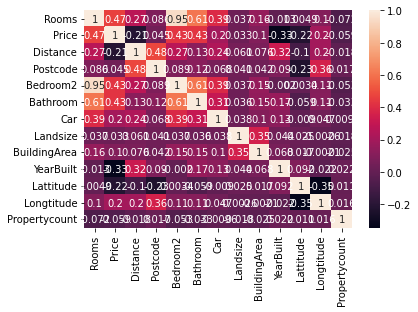

In [ ]:
corr_matrix = sns.heatmap(df.corr(), annot=True)

In [ ]:
df["YearBuilt"].value_counts().sort_index()

1196.0      1
1800.0      1
1820.0      1
1830.0      1
1850.0      4
         ... 
2016.0    130
2017.0     82
2018.0      4
2019.0      1
2106.0      1
Name: YearBuilt, Length: 160, dtype: int64

In [ ]:
df["YearBuilt"].replace(1196, 1996, inplace=True)

In [ ]:
df["YearBuilt"].replace(2106, 2016, inplace=True)

In [ ]:
df["YearBuilt"].value_counts().sort_index()

1800.0      1
1820.0      1
1830.0      1
1850.0      4
1854.0      2
         ... 
2015.0    156
2016.0    131
2017.0     82
2018.0      4
2019.0      1
Name: YearBuilt, Length: 158, dtype: int64

In [ ]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
import re
def extract_street(str):
    return re.sub('[^A-Za-z]+', '', str)

In [ ]:
df["Address"] = df.Address.apply(extract_street)

In [ ]:
df["Address"].value_counts()

BarklySt        146
HighSt          123
ToorakRd         93
DandenongRd      88
VictoriaSt       79
               ... 
aGladstoneAv      1
WunnamurraDr      1
FinhavenCt        1
WexfordCt         1
StradaCr          1
Name: Address, Length: 12164, dtype: int64

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,StudleySt,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,TurnerSt,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,BloomburgSt,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,VictoriaSt,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,CharlesSt,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

In [ ]:
df['Years'] = df['Date'].dt.year

In [ ]:
df["Timestamp"] = df[["Date"]].apply(lambda x: x[0].timestamp(), axis=1).astype(int)

In [ ]:
df = df.drop(["Date"], axis=1)

In [ ]:
#them truong AGE
df['Age'] = 2021 - df['YearBuilt']

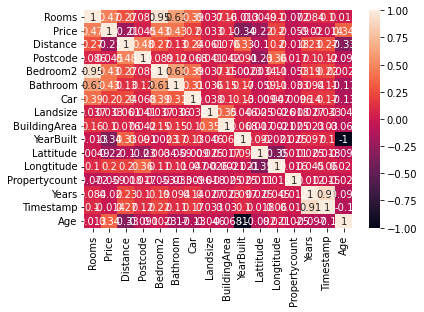

In [ ]:
corr_matrix = sns.heatmap(df.corr(), annot=True)

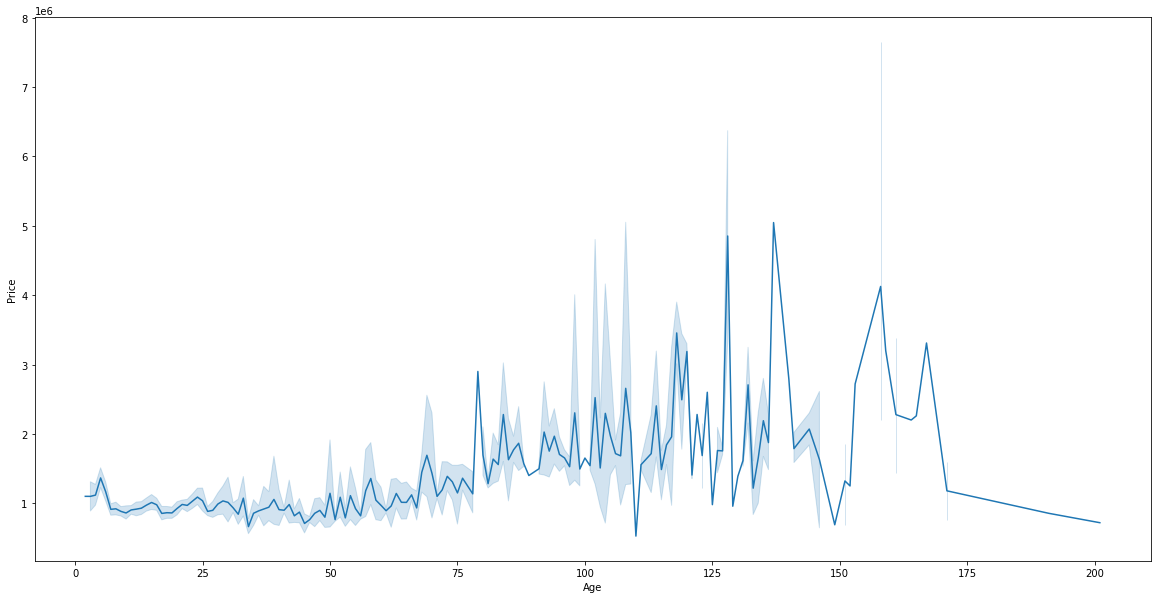

In [ ]:
fig_dims = (20,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=df, x='Age', y='Price')

In [ ]:
df['Historic'] = pd.cut(df['Age'], bins=[0, 25, 50, 75, 100, 125, 150, 175, float('Inf')], labels=['0', '25', '50', '75', '100','125','150','175'])
df['Historic'] = df['Historic'].astype('category')

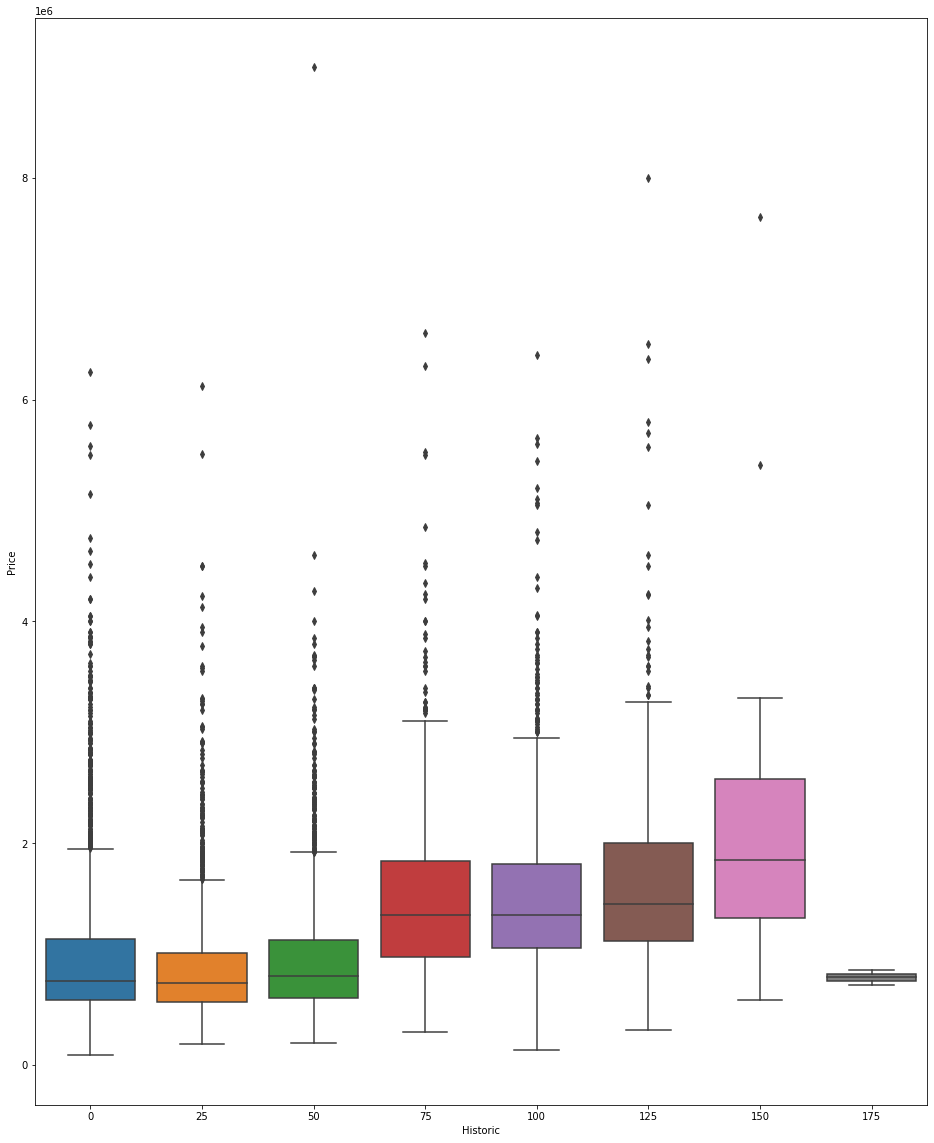

In [ ]:
f, ax = plt.subplots(figsize=(16, 20))
sns.boxplot(x = 'Historic', y = 'Price', data = df)

In [ ]:
df = df.drop(['YearBuilt'], axis=1)

In [ ]:
df = df.drop(['Age'], axis=1)

In [ ]:
df = df.drop(['Years'], axis=1)

In [ ]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Timestamp            0
Historic         19306
dtype: int64

In [ ]:
df.describe(include='object')

,Suburb,Address,Type,Method,SellerG,CouncilArea,Regionname
count,34857,34857,34857,34857,34857,34854,34854
unique,351,12164,3,9,388,33,8
top,Reservoir,BarklySt,h,S,Jellis,Boroondara City Council,Southern Metropolitan
freq,844,146,23980,19744,3359,3675,11836


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  object  
 1   Address        34857 non-null  object  
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  object  
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  object  
 6   SellerG        34857 non-null  object  
 7   Distance       34856 non-null  float64 
 8   Postcode       34856 non-null  float64 
 9   Bedroom2       26640 non-null  float64 
 10  Bathroom       26631 non-null  float64 
 11  Car            26129 non-null  float64 
 12  Landsize       23047 non-null  float64 
 13  BuildingArea   13742 non-null  float64 
 14  CouncilArea    34854 non-null  object  
 15  Lattitude      26881 non-null  float64 
 16  Longtitude     26881 non-null  float64 
 17  Regionname     34854 non-null  

In [ ]:
df.select_dtypes(object).isnull().sum()

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
CouncilArea    3
Regionname     3
dtype: int64

In [ ]:
df = df.dropna(subset=["CouncilArea", "Regionname"], axis=0)

In [ ]:
df.select_dtypes(object).isnull().sum()

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
CouncilArea    0
Regionname     0
dtype: int64

In [ ]:
df.drop(columns='Address', inplace=True)

In [ ]:
counts = df.SellerG.value_counts()
counts

Jellis                  3358
Nelson                  3236
Barry                   3235
hockingstuart           2623
Marshall                2027
                        ... 
hockingstuart/Jellis       1
Benchmark                  1
Foxtons                    1
hockingstuart/Barry        1
McGrath/Buxton             1
Name: SellerG, Length: 388, dtype: int64

In [ ]:
df_copy = df.copy()

In [ ]:
df.SellerG[df_copy['SellerG'].isin(counts[counts < 100].index)] = 'less than 100'
df.SellerG[df_copy['SellerG'].isin(counts[(counts >= 100) & (counts < 200)].index)] = '100 - 200'
df.SellerG[df_copy['SellerG'].isin(counts[(counts >= 200) & (counts < 500)].index)] = '200 - 500'
df.SellerG[df_copy['SellerG'].isin(counts[(counts >= 500) & (counts < 1000)].index)] = '500 - 1000'
df.SellerG[df_copy['SellerG'].isin(counts[counts > 1000].index)] = 'over 1000'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
df.describe(include='object')

,Suburb,Type,Method,SellerG,CouncilArea,Regionname
count,34854,34854,34854,34854,34854,34854
unique,350,3,9,5,33,8
top,Reservoir,h,S,over 1000,Boroondara City Council,Southern Metropolitan
freq,844,23978,19743,18297,3675,11836


In [ ]:
df.drop(columns=['Suburb','Postcode'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Rooms          34854 non-null  int64   
 1   Type           34854 non-null  object  
 2   Price          27244 non-null  float64 
 3   Method         34854 non-null  object  
 4   SellerG        34854 non-null  object  
 5   Distance       34854 non-null  float64 
 6   Bedroom2       26640 non-null  float64 
 7   Bathroom       26631 non-null  float64 
 8   Car            26129 non-null  float64 
 9   Landsize       23047 non-null  float64 
 10  BuildingArea   13742 non-null  float64 
 11  CouncilArea    34854 non-null  object  
 12  Lattitude      26881 non-null  float64 
 13  Longtitude     26881 non-null  float64 
 14  Regionname     34854 non-null  object  
 15  Propertycount  34854 non-null  float64 
 16  Timestamp      34854 non-null  int64   
 17  Historic       15551 non-null  

In [ ]:
df = pd.get_dummies(df, columns=['Type'], prefix='Type')
df = pd.get_dummies(df, columns=['Method'], prefix='Method')
df = pd.get_dummies(df, columns=['Regionname'], prefix='Regionname')
df = pd.get_dummies(df, columns=['Historic'], prefix='Historic')
df = pd.get_dummies(df, columns=['CouncilArea'], prefix='CouncilArea')
df = pd.get_dummies(df, columns=['SellerG'], prefix='SellerG')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34856
Data columns (total 78 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Rooms                                       34854 non-null  int64  
 1   Price                                       27244 non-null  float64
 2   Distance                                    34854 non-null  float64
 3   Bedroom2                                    26640 non-null  float64
 4   Bathroom                                    26631 non-null  float64
 5   Car                                         26129 non-null  float64
 6   Landsize                                    23047 non-null  float64
 7   BuildingArea                                13742 non-null  float64
 8   Lattitude                                   26881 non-null  float64
 9   Longtitude                                  26881 non-null  float64
 10  Propertyco

In [ ]:
df_not_encode = df.iloc[:, 0:12]
df_not_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34856
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          34854 non-null  int64  
 1   Price          27244 non-null  float64
 2   Distance       34854 non-null  float64
 3   Bedroom2       26640 non-null  float64
 4   Bathroom       26631 non-null  float64
 5   Car            26129 non-null  float64
 6   Landsize       23047 non-null  float64
 7   BuildingArea   13742 non-null  float64
 8   Lattitude      26881 non-null  float64
 9   Longtitude     26881 non-null  float64
 10  Propertycount  34854 non-null  float64
 11  Timestamp      34854 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 3.5 MB


In [ ]:
df_not_encode.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Timestamp
count,34854.000000,2.724400e+04,34854.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,26881.000000,26881.000000,34854.000000,3.485400e+04
mean,3.031072,1.050210e+06,11.185204,3.084647,1.624798,1.728845,593.598993,160.25640,-37.810634,145.001851,7572.888306,1.495536e+09
std,0.969943,6.414923e+05,6.788983,0.980690,0.724212,1.010771,3398.841946,401.26706,0.090279,0.120169,4428.090313,1.751951e+07
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-38.190430,144.423790,83.000000,1.453939e+09
25%,2.000000,6.350000e+05,6.400000,2.000000,1.000000,1.000000,224.000000,102.00000,-37.862950,144.933500,4385.000000,1.479514e+09
50%,3.000000,8.700000e+05,10.300000,3.000000,2.000000,2.000000,521.000000,136.00000,-37.807600,145.007800,6763.000000,1.499472e+09
75%,4.000000,1.295000e+06,14.000000,4.000000,2.000000,2.000000,670.000000,188.00000,-37.754100,145.071900,10412.000000,1.509149e+09
max,16.000000,1.120000e+07,48.100000,30.000000,12.000000,26.000000,433014.000000,44515.00000,-37.390200,145.526350,21650.000000,1.521245e+09


In [ ]:
df[['Bedroom2', 'Rooms']].isnull().sum()

Bedroom2    8214
Rooms          0
dtype: int64

In [ ]:
df['Rooms v Bedroom2'] = df['Rooms'] - df['Bedroom2']
df['Rooms v Bedroom2'].mean()

0.016253753753753753

In [ ]:
df = df.drop(['Bedroom2', 'Rooms v Bedroom2'], axis=1)

In [ ]:
remain = ['Landsize', 'BuildingArea', 'Lattitude', 'Longtitude','Bathroom','Car']

In [ ]:
for col in remain:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
df_not_encode = df.iloc[:, 0:11]

In [ ]:
df_not_encode.isnull().sum()

Rooms               0
Price            7610
Distance            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Lattitude           0
Longtitude          0
Propertycount       0
Timestamp           0
dtype: int64

In [ ]:
df = df.dropna(subset=['Price'], axis=0)

In [ ]:
df_not_encode.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Timestamp
count,34854.000000,2.724400e+04,34854.000000,34854.000000,34854.000000,34854.000000,34854.000000,34854.000000,34854.000000,34854.000000,3.485400e+04
mean,3.031072,1.050210e+06,11.185204,1.713318,1.796723,569.005652,145.563650,-37.809940,145.003212,7572.888306,1.495536e+09
std,0.969943,6.414923e+05,6.788983,0.652777,0.883005,2764.026645,252.233483,0.079293,0.105562,4428.090313,1.751951e+07
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-38.190430,144.423790,83.000000,1.453939e+09
25%,2.000000,6.350000e+05,6.400000,1.000000,1.000000,357.000000,136.000000,-37.846900,144.964400,4385.000000,1.479514e+09
50%,3.000000,8.700000e+05,10.300000,2.000000,2.000000,521.000000,136.000000,-37.807600,145.007800,6763.000000,1.499472e+09
75%,4.000000,1.295000e+06,14.000000,2.000000,2.000000,598.000000,136.000000,-37.770893,145.051750,10412.000000,1.509149e+09
max,16.000000,1.120000e+07,48.100000,12.000000,26.000000,433014.000000,44515.000000,-37.390200,145.526350,21650.000000,1.521245e+09


In [ ]:
df_not_encode[df_not_encode['BuildingArea']==0]

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Timestamp
7211,2,841000.0,2.3,1.0,1.0,215.0,0.0,-37.79530,144.94370,6821.0,1488585600
19775,5,1950000.0,9.7,3.0,2.0,743.0,0.0,-37.80235,145.09311,7809.0,1504396800
19840,3,814000.0,12.1,1.0,2.0,542.0,0.0,-37.70861,145.05691,10175.0,1504396800
20038,3,NaN,8.8,1.0,2.0,658.0,0.0,-37.75287,145.05547,2947.0,1504396800
20223,4,570000.0,20.6,2.0,2.0,504.0,0.0,-37.61419,144.93448,5833.0,1504396800
...,...,...,...,...,...,...,...,...,...,...,...
32936,4,722500.0,25.5,2.0,2.0,512.0,0.0,-37.61971,145.02910,2940.0,1518825600
33397,4,677000.0,20.4,2.0,2.0,312.0,0.0,-37.62439,144.88629,4864.0,1521244800
33660,3,950000.0,8.4,1.0,2.0,301.0,0.0,-37.75302,145.00948,14577.0,1521244800
33899,4,615000.0,25.5,2.0,2.0,392.0,0.0,-37.61252,145.04288,2940.0,1521244800


In [ ]:
df_not_encode[df_not_encode['Landsize']==0]

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Timestamp
3,3,NaN,2.5,2.0,1.0,0.0,136.00,-37.81140,145.01160,4019.0,1454544000
17,1,300000.0,2.5,1.0,1.0,0.0,136.00,-37.80080,144.99730,4019.0,1475884800
23,2,700000.0,2.5,2.0,1.0,0.0,136.00,-37.81100,145.00670,4019.0,1478908800
25,2,750000.0,2.5,2.0,1.0,0.0,94.00,-37.80780,144.99650,4019.0,1478908800
29,1,441000.0,2.5,1.0,1.0,0.0,136.00,-37.80160,144.99880,4019.0,1463184000
...,...,...,...,...,...,...,...,...,...,...,...
19696,3,1050000.0,10.2,2.0,2.0,0.0,136.00,-37.83358,145.09884,5457.0,1501286400
19710,2,300000.0,12.9,1.0,1.0,0.0,66.32,-37.69815,144.88019,3296.0,1501286400
19725,2,NaN,6.4,1.0,1.0,0.0,92.00,-37.80029,144.87859,5058.0,1501286400
19734,1,385000.0,6.8,1.0,1.0,0.0,35.64,-37.85588,144.89936,6380.0,1501286400


In [ ]:
df_not_encode[(df_not_encode['BuildingArea']==0) & (df_not_encode['Rooms']>=1) ]

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Timestamp
7211,2,841000.0,2.3,1.0,1.0,215.0,0.0,-37.79530,144.94370,6821.0,1488585600
19775,5,1950000.0,9.7,3.0,2.0,743.0,0.0,-37.80235,145.09311,7809.0,1504396800
19840,3,814000.0,12.1,1.0,2.0,542.0,0.0,-37.70861,145.05691,10175.0,1504396800
20038,3,NaN,8.8,1.0,2.0,658.0,0.0,-37.75287,145.05547,2947.0,1504396800
20223,4,570000.0,20.6,2.0,2.0,504.0,0.0,-37.61419,144.93448,5833.0,1504396800
...,...,...,...,...,...,...,...,...,...,...,...
32936,4,722500.0,25.5,2.0,2.0,512.0,0.0,-37.61971,145.02910,2940.0,1518825600
33397,4,677000.0,20.4,2.0,2.0,312.0,0.0,-37.62439,144.88629,4864.0,1521244800
33660,3,950000.0,8.4,1.0,2.0,301.0,0.0,-37.75302,145.00948,14577.0,1521244800
33899,4,615000.0,25.5,2.0,2.0,392.0,0.0,-37.61252,145.04288,2940.0,1521244800


In [ ]:
df_not_encode[(df_not_encode['BuildingArea']==0) & (df_not_encode['Landsize']==0) ]

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Timestamp


In [ ]:
df['BuildingArea'] = np.where(df['BuildingArea'] == 0, df['Landsize'], df['BuildingArea'])

In [ ]:
df[(df['BuildingArea']==0) & (df['Rooms']>=1) ]

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Timestamp,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Historic_0,Historic_25,Historic_50,Historic_75,Historic_100,Historic_125,Historic_150,Historic_175,CouncilArea_Banyule City Council,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,SellerG_100 - 200,SellerG_200 - 500,SellerG_500 - 1000,SellerG_less than 100,SellerG_over 1000


In [ ]:
X = df.drop(["Price"], axis=1)
y = df["Price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor

In [ ]:
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler = preprocessing.MinMaxScaler().fit(y_train.values.reshape(-1,1))
y_train = scaler.transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
DTR_para = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
            'min_samples_leaf': [1,5,10,20,50]}
print(GridSearchCV(DecisionTreeRegressor(), param_grid=DTR_para).fit(X_train, y_train).best_estimator_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [ ]:
max_depth = [1,5,10,20,30,50]

train_error = []
test_error = []

for i in max_depth:
  DTR = DecisionTreeRegressor(max_depth=i, min_samples_leaf=20, random_state=5)
  DTR.fit(X_train, y_train)
  train_error.append(np.sqrt(mean_squared_error(y_train, DTR.predict(X_train))))
  test_error.append(np.sqrt(mean_squared_error(y_test, DTR.predict(X_test))))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


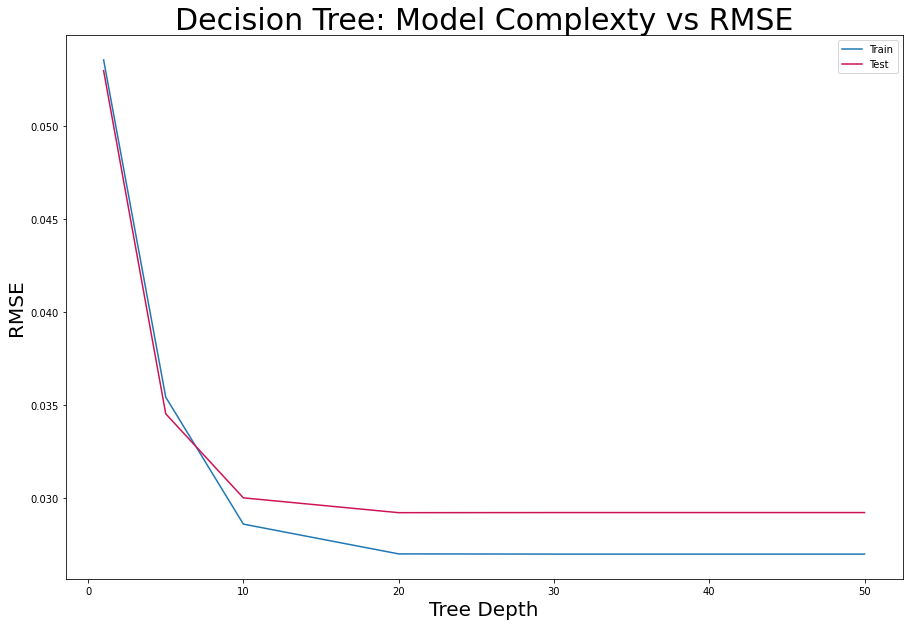

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Decision Tree: Model Complexty vs RMSE', fontsize=30)
plt.ylabel('RMSE', fontsize=20)
plt.xlabel('Tree Depth', fontsize=20)
sns.lineplot(max_depth, train_error, label='Train')
sns.lineplot(max_depth, test_error, color='#ce1256', label='Test')
plt.show()

In [ ]:
DTR = DecisionTreeRegressor(max_depth=30, min_samples_leaf=20, random_state=5)
DTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

In [ ]:
#train set
print('MAE: {:>0.11f}'.format(mean_absolute_error(y_train, DTR.predict(X_train))))
print('\nMSE: {:>0.11f}'.format(mean_squared_error(y_train, DTR.predict(X_train))))
print('\nRMSE: {:>0.11f}'.format(np.sqrt(mean_squared_error(y_train, DTR.predict(X_train)))))
print('\nR^2: {:>0.11f}'.format(DTR.score(X_train, y_train)))

MAE: 0.01536894909

MSE: 0.00072841082

RMSE: 0.02698908704

R^2: 0.78303373128


In [ ]:
#test set
print('MAE: {:>0.11f}'.format(mean_absolute_error(y_test, DTR.predict(X_test))))
print('\nMSE: {:>0.11f}'.format(mean_squared_error(y_test, DTR.predict(X_test))))
print('\nRMSE: {:>0.11f}'.format(np.sqrt(mean_squared_error(y_test, DTR.predict(X_test)))))
print('\nR^2: {:>0.11f}'.format(DTR.score(X_test, y_test)))

MAE: 0.01749309387

MSE: 0.00085380329

RMSE: 0.02921991248

R^2: 0.74174797751


In [ ]:
print('Model Evaluation:')
print('-'*50)
print('{} {:>17}'.format('Statistic', 'Decision Tree'))
print('-'*50)
print('{} {:>18.11f}'.format('MAE Test', mean_absolute_error(y_test, DTR.predict(X_test))))
print('{} {:>18.11f}'.format('MSE Test', mean_squared_error(y_test, DTR.predict(X_test))))
print('{} {:>17.11f}'.format('RMSE Test', np.sqrt(mean_squared_error(y_test, DTR.predict(X_test)))))
print('{} {:>18.11f}'.format('R^2 Test', DTR.score(X_test, y_test)))


Model Evaluation:
--------------------------------------------------
Statistic     Decision Tree
--------------------------------------------------
MAE Test      0.01749309387
MSE Test      0.00085380329
RMSE Test     0.02921991248
R^2 Test      0.74174797751
